In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py

import astropy.units as u
from astropy.table import Table, Column, join
from IPython.display import Image, display

from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt

from caterpillar import catalog

import sys
sys.path.insert(1, '/home/ksf293/anomalies-GAN-HSC/analysis')
import plotter
import utils

In [2]:
import matplotlib
from matplotlib import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize': 'large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large'}
pylab.rcParams.update(params)

In [6]:
base_dir = '/scratch/ksf293/anomalies'
plot_dir = '/home/ksf293/anomalies-GAN-HSC/plots/plots_2021-05-01'
#plot_dir = '/home/ksf293/anomalies-GAN-HSC/papers/paper_main/images'

## Anomaly umap

In [16]:
purple_ids = [631495, 60339, 105685, 80217, 378977, 355424, 690942, 726364, 477930]
bluesf_ids = [461525, 461522, 702705, 402208, 86279, 27054, 207619, 461523, 554045] #54348 something close to that
tidal_ids = [406992,232476,402855,112806, 771116, 116299, 193323, 357136, 734970] #390040, 526030
merger_ids = [147100,105162, 609137,275917, 273903, 331753, 476493, 516719, 864590]  #402153
unknown_ids = [404340, 402594, 822595, 372063, 732308, 604860] #66001
bluecore_ids = [941128, 782291, 490258] #585702, 494887
unknown_bluecore_ids = unknown_ids + bluecore_ids

In [21]:
highlight_arrs = [purple_ids, bluesf_ids, tidal_ids, merger_ids, unknown_bluecore_ids]
highlight_colors = ['purple', 'deepskyblue', 'orange', 'red', 'forestgreen']
highlight_markers = ['^', 'd', '*', 'v', '.']

In [18]:
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Purples')
cmap_purp = truncate_colormap(cmap, 0.25, 1.0)

In [19]:
embed_dir = f"{base_dir}/results/embeddings"

tag_u = 'gri_lambda0.3_3sigd'
umap_tag = '_nn5md0.1'
auto_tag = '_model30000_latent64_residuals_long'

results_fn_u = f'{base_dir}/results/results_{tag_u}.h5'
res_u = h5py.File(results_fn_u, 'r')
scores_u = res_u['disc_scores_sigma']

embedding = np.load(f"{embed_dir}/embedding_umap_auto_{tag_u}{auto_tag}{umap_tag}.npy", allow_pickle=True)

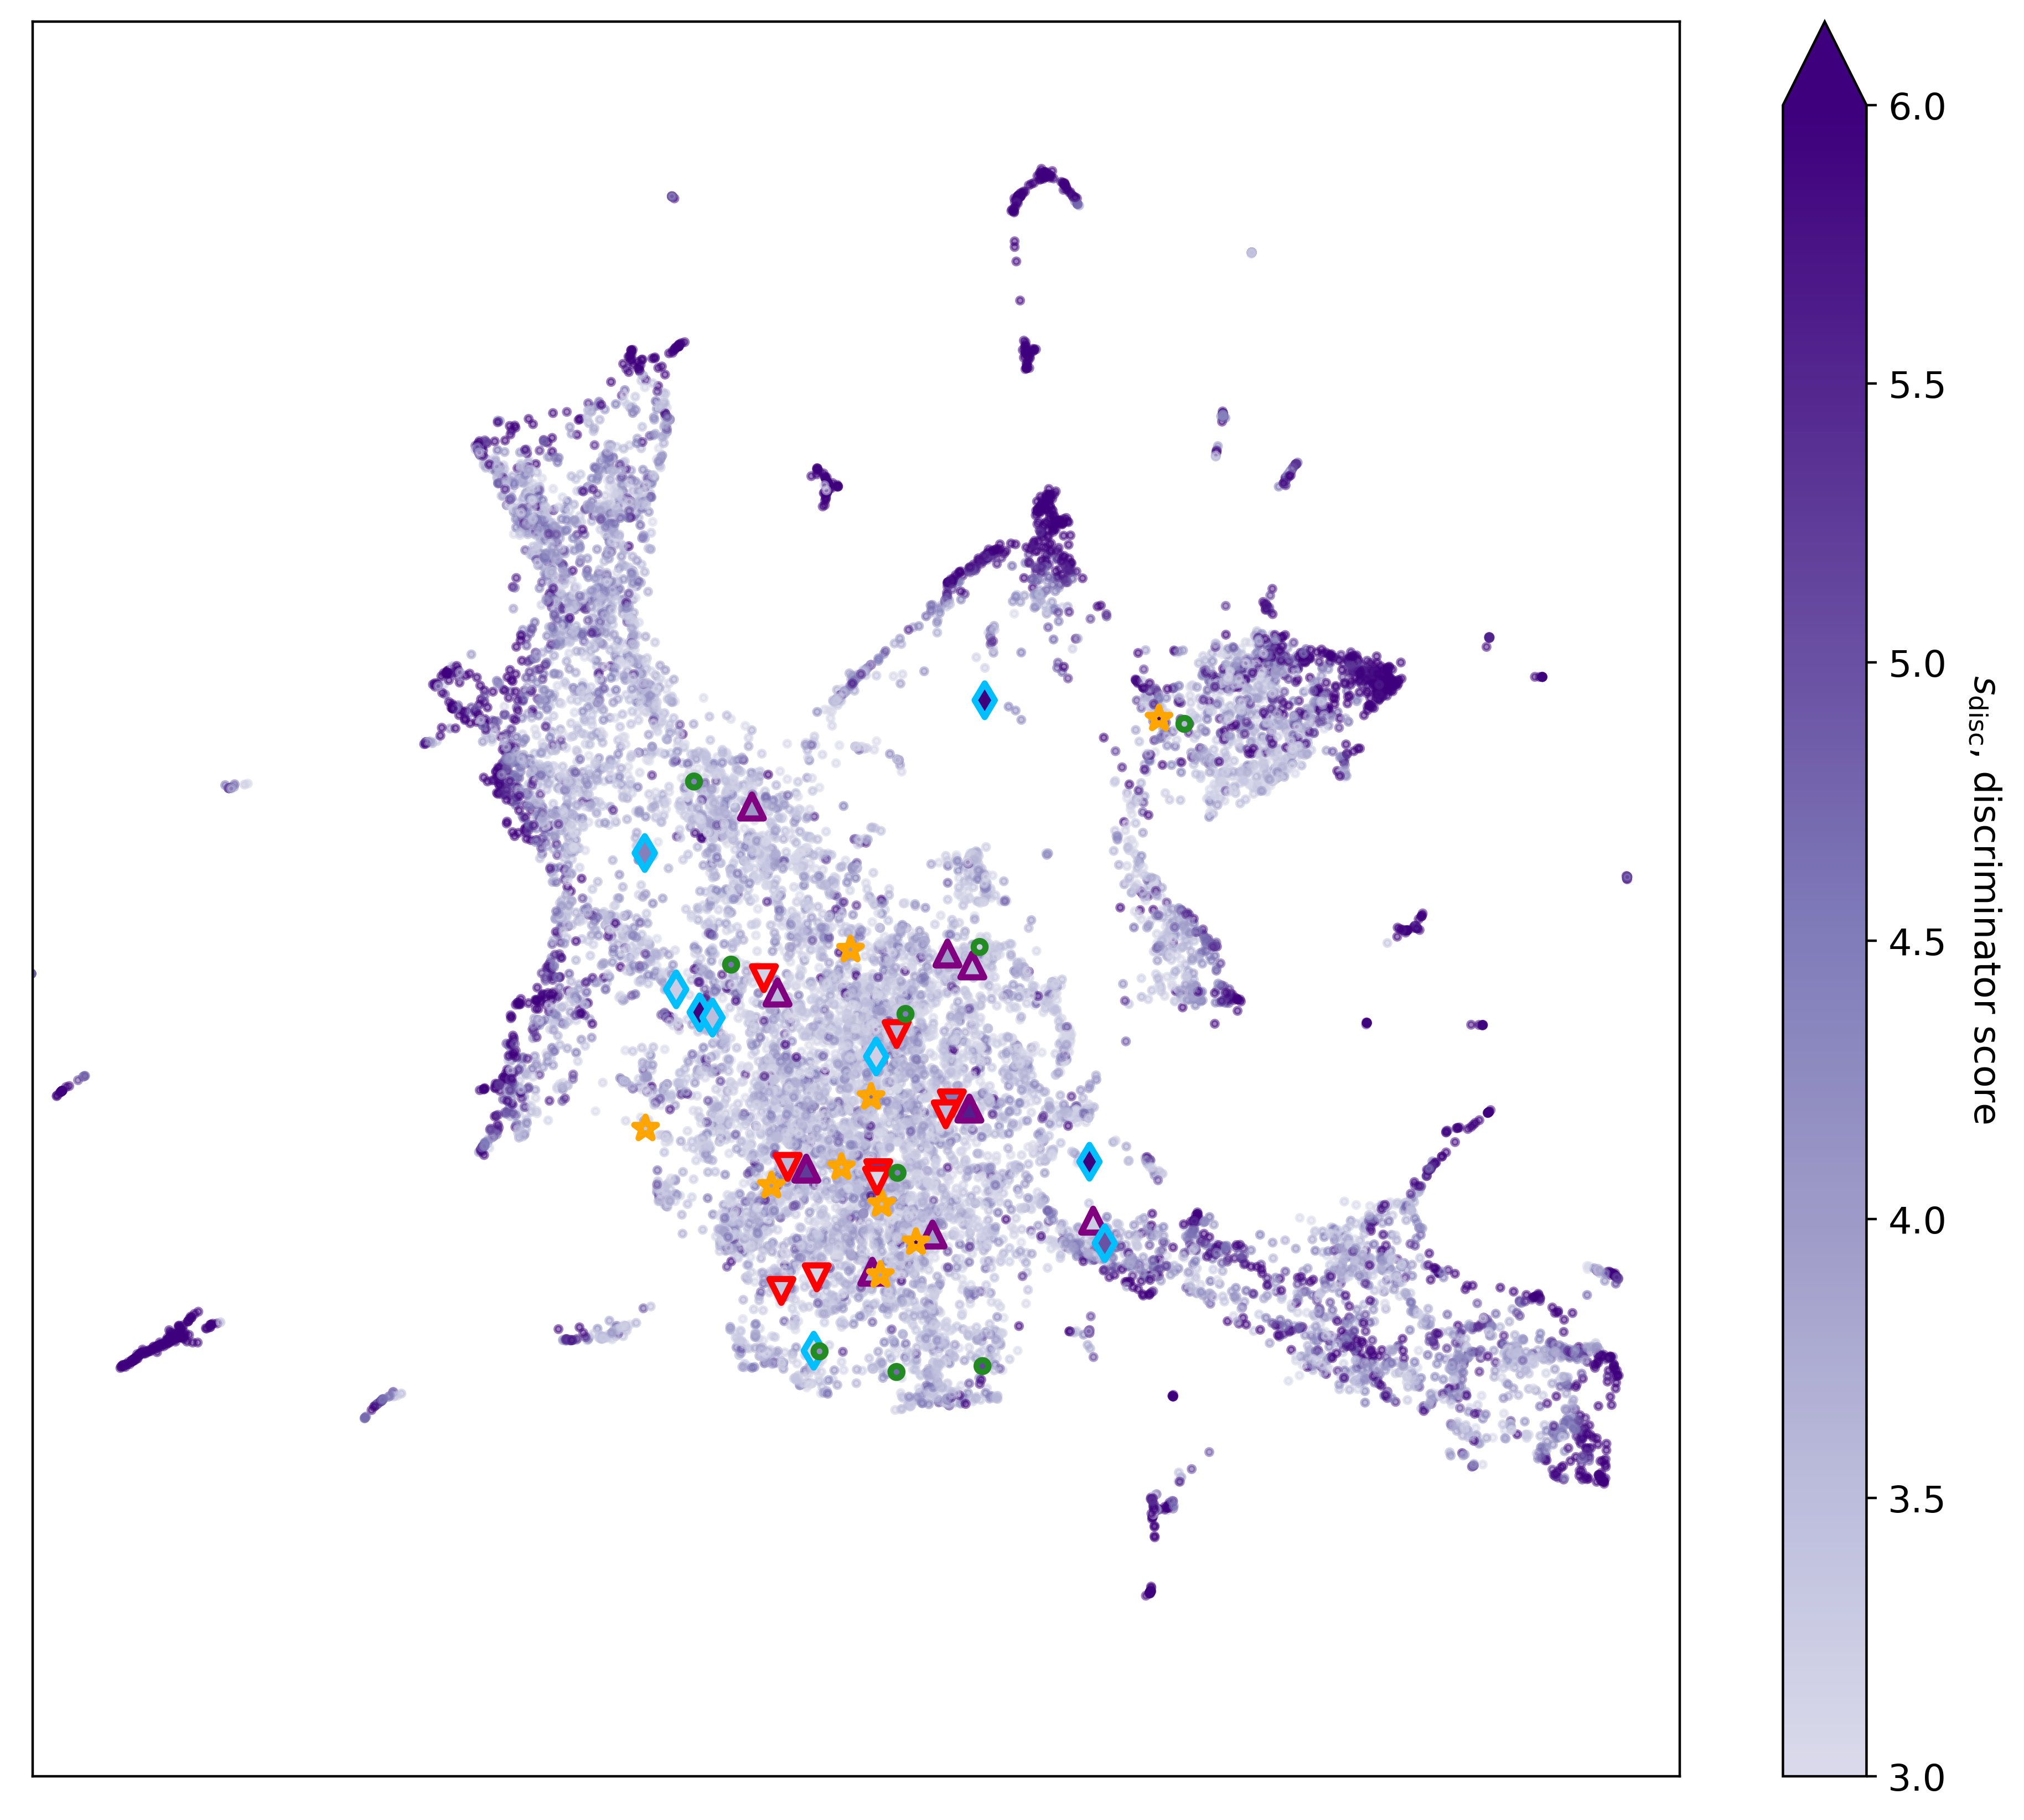

In [22]:
saveto = f'{plot_dir}/umap_3sigd_resids_auto_highlight.png'
ax = plotter.plot_umap(embedding, highlight_arrs=highlight_arrs, highlight_colors=highlight_colors, 
                      highlight_markers=highlight_markers, saveto=saveto, cmap=cmap_purp, 
                      figsize=(12,10.5),
                      xlim=[-1.5,18], ylim=[-4,15.5], 
                      alpha=0.5, s=20, vmin=3, vmax=6)

Lol not great...!